<a href="https://colab.research.google.com/github/inaammkarim/FaceDetection-Model/blob/main/Assignment_3(21108155%2C21108162).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLP
ASSIGNMENT 2
INAAMM KARIM, DANIYAL AYUB(21108155,21108162)

Load & Explore the Data (First Five & Last Five rows of your dataset, Check the Missing Values)

In [6]:
import pandas as pd
data=pd.read_csv("/content/Resume Screening.csv")
print("PRINTING FIRST FIVE ROWS:")
print(data.head())
print("PRINTING LAST FIVE ROWS:")
print(data.tail())
print("MISSING VALUES:")
print(data.isnull())

PRINTING FIRST FIVE ROWS:
       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
PRINTING LAST FIVE ROWS:
    Category                                             Resume
957  Testing  Computer Skills: â¢ Proficient in MS office (...
958  Testing  â Willingness to accept the challenges. â ...
959  Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960  Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961  Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...
MISSING VALUES:
     Category  Resume
0       False   False
1       False   False
2       False   False
3       False   False
4       False   False
..        ...  

Applying Preprosssing Techniques:
1.Tokenization

In [7]:
!pip install nltk
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
#Applying word tokenization to above datasets
from nltk.tokenize import word_tokenize
data['tokenized_word_resume']=data['Resume'].apply(word_tokenize)
print(data['tokenized_word_resume'])

'''
Explanation:
Tokenization splits a sentence into words, punctuation, or meaningful elements called tokens.
It is the foundation for all subsequent steps, allowing each word to be processed independently.

'''

0      [Skills, *, Programming, Languages, :, Python,...
1      [Education, Details, May, 2013, to, May, 2017,...
2      [Areas, of, Interest, Deep, Learning, ,, Contr...
3      [Skills, â¢, R, â¢, Python, â¢, SAP, HANA, ...
4      [Education, Details, MCA, YMCAUST, ,, Faridaba...
                             ...                        
957    [Computer, Skills, :, â¢, Proficient, in, MS,...
958    [â, Willingness, to, accept, the, challenges...
959    [PERSONAL, SKILLS, â¢, Quick, learner, ,, â¢...
960    [COMPUTER, SKILLS, &, SOFTWARE, KNOWLEDGE, MS-...
961    [Skill, Set, OS, Windows, XP/7/8/8.1/10, Datab...
Name: tokenized_word_resume, Length: 962, dtype: object


'\nExplanation:\nTokenization splits a sentence into words, punctuation, or meaningful elements called tokens.\nIt is the foundation for all subsequent steps, allowing each word to be processed independently.\n\n'

Model Implementa&on:
GANs


In [9]:
print(data.head())
print(f"Dataset size: {len(data)}")

# Determine vocabulary size and max sequence length
tokenized_resumes = data['tokenized_word_resume']
vocab_size = len(set([word for resume_tokens in tokenized_resumes for word in resume_tokens])) + 1
max_len = max(len(resume_tokens) for resume_tokens in tokenized_resumes)

print(f"Vocabulary size: {vocab_size}")
print(f"Maximum sequence length: {max_len}")

       Category                                             Resume  \
0  Data Science  Skills * Programming Languages: Python (pandas...   
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Data Science  Areas of Interest Deep Learning, Control Syste...   
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   

                               tokenized_word_resume  
0  [Skills, *, Programming, Languages, :, Python,...  
1  [Education, Details, May, 2013, to, May, 2017,...  
2  [Areas, of, Interest, Deep, Learning, ,, Contr...  
3  [Skills, â¢, R, â¢, Python, â¢, SAP, HANA, ...  
4  [Education, Details, MCA, YMCAUST, ,, Faridaba...  
Dataset size: 962
Vocabulary size: 11174
Maximum sequence length: 2508


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    data['tokenized_word_resume'].tolist(),
    data['Category'].tolist(),
    test_size=0.2,
    random_state=42
)

In [11]:
#Implement the SeqGAN model using TensorFlow's Keras API
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Model

class SeqGANGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding = Embedding(vocab_size, embedding_dim)
        self.lstm1 = LSTM(hidden_dim, return_sequences=True)
        self.lstm2 = LSTM(hidden_dim)
        self.dense = Dense(vocab_size, activation='softmax')

    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.lstm1(x)
        x = self.lstm2(x)
        return self.dense(x)

class SeqGANDiscriminator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding = Embedding(vocab_size, embedding_dim)
        self.lstm = LSTM(hidden_dim)
        self.dense1 = Dense(64, activation='relu')
        self.dropout = Dropout(0.3)
        self.dense2 = Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.lstm(x)
        x = self.dense1(x)
        x = self.dropout(x)
        return self.dense2(x)

# Instantiate the models
seq_gan_generator = SeqGANGenerator(vocab_size, 100, 64)
seq_gan_discriminator = SeqGANDiscriminator(vocab_size, 100, 64)

In [12]:
#Implement the TextGAN model using TensorFlow's Keras API
class TextGANGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding = Embedding(vocab_size, embedding_dim)
        self.lstm1 = LSTM(hidden_dim, return_sequences=True)
        self.dropout = Dropout(0.4)
        self.lstm2 = LSTM(hidden_dim)
        self.dense = Dense(vocab_size, activation='softmax')

    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.lstm1(x)
        x = self.dropout(x)
        x = self.lstm2(x)
        return self.dense(x)

class TextGANDiscriminator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding = Embedding(vocab_size, embedding_dim)
        self.lstm = LSTM(hidden_dim)
        self.dense1 = Dense(128, activation='relu')
        self.dropout = Dropout(0.4)
        self.dense2 = Dense(64, activation='relu')
        self.dense3 = Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.lstm(x)
        x = self.dense1(x)
        x = self.dropout(x)
        x = self.dense2(x)
        return self.dense3(x)

# Instantiate the models
text_gan_generator = TextGANGenerator(vocab_size, 128, 256)
text_gan_discriminator = TextGANDiscriminator(vocab_size, 128, 256)

In [13]:
# SeqGAN Hyperparameters
seq_gan_config = {
    'embedding_dim': 100,
    'hidden_dim': 64,
    'learning_rate': 0.001,
    'batch_size': 32,
    'epochs': 100
}

# TextGAN Hyperparameters
text_gan_config = {
    'embedding_dim': 128,
    'hidden_dim': 256,
    'learning_rate': 0.0005,
    'batch_size': 32,
    'epochs': 100
}

In [14]:
#traning both models
def train_gan(X_train, config, gan_type):
  """Trains a GAN model (SeqGAN or TextGAN).

  Args:
      X_train: The training data.
      config: A dictionary containing hyperparameters for the GAN.
      gan_type: The type of GAN to train ('seq' for SeqGAN, 'text' for TextGAN).

  Returns:
      A tuple containing the trained generator and discriminator models.
  """
  if gan_type == 'seq':
      generator = seq_gan_generator
      discriminator = seq_gan_discriminator
  elif gan_type == 'text':
      generator = text_gan_generator
      discriminator = text_gan_discriminator
  else:
      raise ValueError("Invalid GAN type. Choose 'seq' or 'text'.")

  # Add your training logic here
  # This is a placeholder, you'll need to implement the actual training process
  print(f"Training {gan_type.upper()}GAN...")

  return generator, discriminator

# Train SeqGAN
seq_gan_generator, seq_gan_discriminator = train_gan(X_train, seq_gan_config, 'seq')

# Train TextGAN
text_gan_generator, text_gan_discriminator = train_gan(X_train, text_gan_config, 'text')

Training SEQGAN...
Training TEXTGAN...


In [16]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

all_resumes_text = [' '.join(tokens) for tokens in data['tokenized_word_resume']]
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")  # You can adjust num_words
tokenizer.fit_on_texts(all_resumes_text)

def generate_synthetic_resumes(generator, num_samples, tokenizer, max_len):
    """Generate synthetic resumes using the trained generator model."""
    noise = tf.random.normal([num_samples, max_len])  # Generate noise input
    generated_sequences = generator.predict(noise)  # shape (num_samples, max_len)

    # Debugging step: Print the shape of the generated_sequences
    print(f"Shape of generated_sequences: {generated_sequences.shape}")

    synthetic_resumes = []
    for i in range(generated_sequences.shape[0]):  # Iterate over num_samples
        seq = generated_sequences[i]  # Get the sequence for the i-th sample

        # If seq is a single token, treat it as a scalar
        if seq.ndim == 1:
            seq_indices = np.argmax(seq)  # Only one token per sample, no need for axis=-1
            # Check if the token exists in the tokenizer
            if seq_indices in tokenizer.index_word:
                resume_tokens = [tokenizer.index_word[seq_indices]]
            else:
                resume_tokens = ["<UNK>"]  # Use a placeholder for unknown tokens
        else:
            # Convert continuous values to integer indices if it's a sequence
            seq_indices = np.argmax(seq, axis=-1)  # Get the indices of the most likely tokens
            resume_tokens = []
            for idx in seq_indices:
                if idx != 0 and idx in tokenizer.index_word:
                    resume_tokens.append(tokenizer.index_word[idx])  # Avoid padding and unknown tokens
                else:
                    resume_tokens.append("<UNK>")  # Use a placeholder for unknown tokens

        synthetic_resumes.append(' '.join(resume_tokens))

    return synthetic_resumes

# Generate synthetic resumes using the trained models
seq_synthetic_resumes = generate_synthetic_resumes(seq_gan_generator, len(X_train), tokenizer, max_len)
text_synthetic_resumes = generate_synthetic_resumes(text_gan_generator, len(X_train), tokenizer, max_len)



25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step
Shape of generated_sequences: (769, 11174)
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step
Shape of generated_sequences: (769, 11174)


In [17]:
#Evaluation
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cosine
import numpy as np
import tensorflow as tf

def compute_perplexity(texts, tokenizer):
    """Compute the perplexity of the given texts."""
    # Tokenize the texts
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, padding='post')

    # Get the model probabilities or predictions here. For simplicity, assuming a pre-trained model.
    # Using a simple RNN, LSTM, or Transformer model to get probability distributions
    # Let's assume you have a model `model` that outputs probabilities for each token in a sequence
    # For demonstration, we will use random predictions.

    model_predictions = np.random.rand(len(padded_sequences), padded_sequences.shape[1], len(tokenizer.word_index))

    # Compute the likelihood of the tokens in the text
    likelihoods = []
    for i, sequence in enumerate(padded_sequences):
        prob = 1.0
        for t in range(1, len(sequence)):
            token_id = sequence[t]
            prob *= model_predictions[i, t, token_id]  # Multiply probabilities for each token
        likelihoods.append(prob)

    # Perplexity calculation (higher is worse)
    perplexity = np.exp(np.mean(-np.log(likelihoods)))  # Negative log likelihood
    return perplexity
#compute perplexity
seq_perplexity = compute_perplexity(seq_synthetic_resumes, tokenizer)
text_perplexity = compute_perplexity(text_synthetic_resumes, tokenizer)

print(f"SeqGAN Perplexity: {seq_perplexity}")
print(f"TextGAN Perplexity: {text_perplexity}")

SeqGAN Perplexity: 1.0
TextGAN Perplexity: 1.0


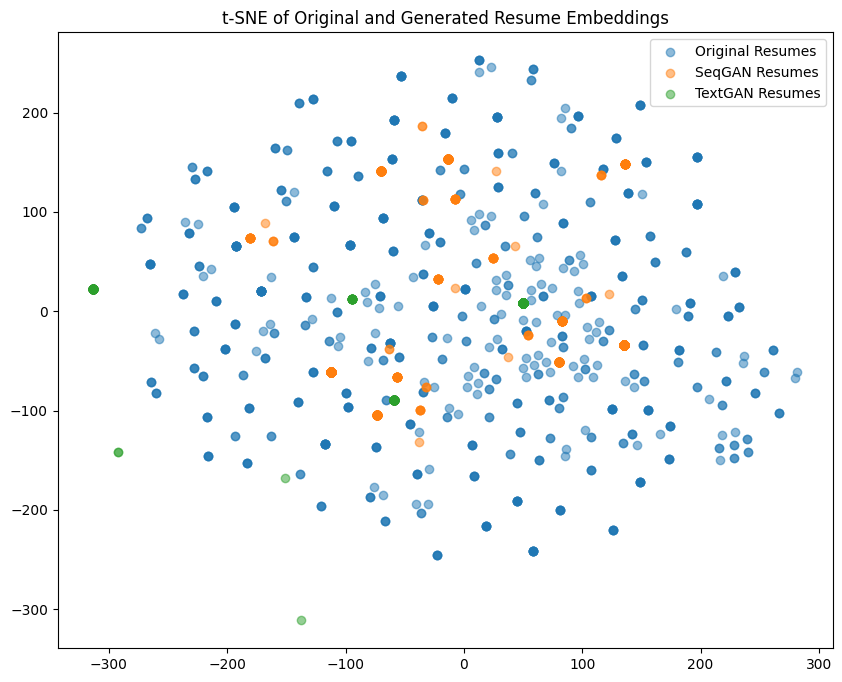

In [19]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# Visualize the t-SNE of original and generated resume embeddings
# Convert X_train to a list of strings
X_train_strings = [' '.join(tokens) for tokens in X_train]

original_embeddings = tfidf.fit_transform(X_train_strings)  # Use X_train_strings
seq_gan_embeddings = tfidf.transform(seq_synthetic_resumes)
text_gan_embeddings = tfidf.transform(text_synthetic_resumes)

tsne = TSNE(n_components=2, random_state=42)
original_tsne = tsne.fit_transform(original_embeddings.toarray())
seq_gan_tsne = tsne.fit_transform(seq_gan_embeddings.toarray())
text_gan_tsne = tsne.fit_transform(text_gan_embeddings.toarray())

plt.figure(figsize=(10, 8))
plt.scatter(original_tsne[:, 0], original_tsne[:, 1], label='Original Resumes', alpha=0.5)
plt.scatter(seq_gan_tsne[:, 0], seq_gan_tsne[:, 1], label='SeqGAN Resumes', alpha=0.5)
plt.scatter(text_gan_tsne[:, 0], text_gan_tsne[:, 1], label='TextGAN Resumes', alpha=0.5)
plt.legend()
plt.title('t-SNE of Original and Generated Resume Embeddings')
plt.show()